In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from collections import OrderedDict
from itertools import compress
from cycler import cycler

In [2]:
# Read in time course from minireader for each plate. Alpha/Bravo/Charlie/Delta indicates the name of the
# specific minireader used, and plate 1-4 corresponds to the 4 96-well plates.
plate1 = pd.read_excel('../data/coculture_growth_curves/PLATE_Delta_plate1_20170128.xls',sheetname='RES0_od')
plate2 = pd.read_excel('../data/coculture_growth_curves/PLATE_Alpha_plate2_20170128.xls',sheetname='RES0_od')
plate3 = pd.read_excel('../data/coculture_growth_curves/PLATE_Bravo_plate3_20170128.xls',sheetname='RES0_od')
plate4 = pd.read_excel('../data/coculture_growth_curves/PLATE_Charlie_plate4_20170128.xls',sheetname='RES0_od')

# Read the plate layout file. All plates have identical layouts.
# The plate layout file also includes endpoint OD600 for all 4 plates as measured by the Tecan.
plate_layout = pd.read_csv('../data/coculture_growth_curves/plate_layout_20170128.tsv',sep='\t')


In [3]:
# Discard wells that had obvious hardware issues. replace with NaNs to make plotting easier.
plate3['C4'] = np.nan # This well had 0 signal, and just looks like noise centered around 0
plate2['E6'] = np.nan # This curve was inverted and any signal changes look like artifacts from tempurature
plate4['B7'] = np.nan # This curve was also inverted.

In [4]:
# discard reads before temp = 37.0*C
plate1 = plate1[plate1['Temperature (deg. C)'] >= 37.0 ]
plate2 = plate2.ix[(plate1['Temperature (deg. C)'] >= 37.0 ).index]
plate3 = plate3.ix[(plate1['Temperature (deg. C)'] >= 37.0 ).index]
plate4 = plate4.ix[(plate1['Temperature (deg. C)'] >= 37.0 ).index]

# replace timestamp with time in minutes (reads are taken every 5 minutes)
plate1['Time (m)'] = (plate1.index - plate1.index[0])*5
plate2['Time (m)'] = (plate2.index - plate2.index[0])*5
plate3['Time (m)'] = (plate3.index - plate3.index[0])*5
plate4['Time (m)'] = (plate4.index - plate4.index[0])*5

# Luckily, all of the plates had the exact same number of reads, so the timestamps are all identical!
# This means we don't need to interpolate any of the growth curves for plotting or averaging.

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [5]:
# Plate4 D11 had a scrath that artificially raised OD, so let's remove it.
replace = plate_layout[plate_layout['well'] == 'D11']
replace['plate4_tecan_od'] = np.nan
plate_layout[plate_layout['well'] == 'D11'] = replace
plate_layout[40:50]

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,well,species,plate1_tecan_od,plate2_tecan_od,plate3_tecan_od,plate4_tecan_od
40,D5,356;500,0.2681,0.2575,0.2759,0.2809
41,D6,360;361,0.1493,0.1531,0.1419,0.1672
42,D7,360;502,0.0868,0.0882,0.0799,0.0832
43,D8,361;500,0.1584,0.1637,0.1437,0.1408
44,D9,492;500,0.1726,0.1651,0.1465,0.1691
45,D10,500;502,0.0747,0.0748,0.0757,0.0742
46,D11,BLANK,0.0736,0.0741,0.0741,NaN
47,D12,NaN,0.0705,0.0709,0.0709,0.0715
48,E1,NaN,0.0711,0.0719,0.0712,0.0718
49,E2,360,0.0784,0.0801,0.0752,0.0781


In [6]:
species = ['356','360','361','492','500','502','519']
for specie in species:
            plate_layout[specie] = plate_layout['species'].str.contains(specie)
species = ['356','360','361','492','500','502','519']
single_species = plate_layout[plate_layout[species].sum(axis=1) == 1]
plate_layout_copy = plate_layout[['well','plate1_tecan_od']]
plate_layout_copy.index = plate_layout_copy['well']
plate_layout_copy.drop(labels='well',inplace=True,axis=1)
plate_layout_copy.transpose().loc['plate1_tecan_od']

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


well
A1     0.0696
A2     0.0711
A3     0.0714
A4     0.0709
A5     0.0712
A6     0.0721
A7     0.0713
A8     0.0714
A9     0.0711
A10    0.0717
A11    0.0714
A12    0.0680
B1     0.0703
B2     0.2216
B3     0.1564
B4     0.2396
B5     0.2573
B6     0.3480
B7     0.0862
B8     0.1536
B9     0.1970
B10    0.2576
B11    0.3679
B12    0.0686
C1     0.0704
C2     0.2290
C3     0.1557
C4     0.2330
C5     0.2681
C6     0.3476
        ...  
F7     0.3635
F8     0.1626
F9     0.1701
F10    0.3118
F11    0.0741
F12    0.0712
G1     0.0716
G2     0.1572
G3     0.0740
G4     0.1730
G5     0.2429
G6     0.1262
G7     0.4093
G8     0.1570
G9     0.1743
G10    0.3443
G11    0.0743
G12    0.0714
H1     0.0719
H2     0.0745
H3     0.0747
H4     0.0743
H5     0.0742
H6     0.0742
H7     0.0740
H8     0.0740
H9     0.0733
H10    0.0737
H11    0.0743
H12    0.0712
Name: plate1_tecan_od, Length: 96, dtype: float64

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


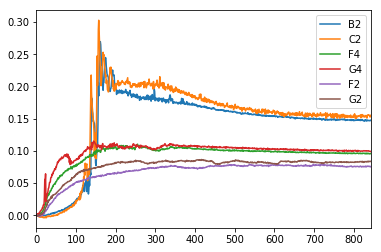

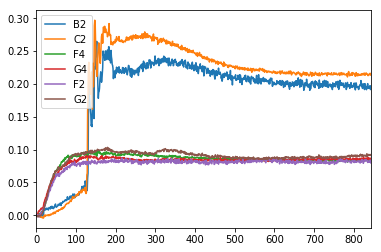

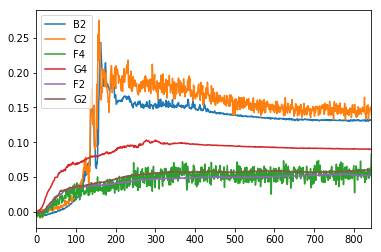

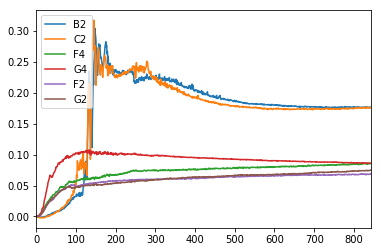

In [7]:
# Determine blank value to substract from final tecan reading for each plate.
# Get average of the 4 blanks for each plate.
plate1_blanks = plate_layout[plate_layout['species'] == 'BLANK']['plate1_tecan_od']
plate2_blanks = plate_layout[plate_layout['species'] == 'BLANK']['plate2_tecan_od']
plate3_blanks = plate_layout[plate_layout['species'] == 'BLANK']['plate3_tecan_od']
plate4_blanks = plate_layout[plate_layout['species'] == 'BLANK']['plate4_tecan_od']

p1_blank_mean = plate1_blanks.mean()
p2_blank_mean = plate2_blanks.mean()
p3_blank_mean = plate3_blanks.mean()
p4_blank_mean = plate4_blanks.mean()

p1_od_only = plate1.drop(labels=['UNIX Timestamp','Temperature (deg. C)','Time (m)'],axis=1)
p2_od_only = plate2.drop(labels=['UNIX Timestamp','Temperature (deg. C)','Time (m)'],axis=1)
p3_od_only = plate3.drop(labels=['UNIX Timestamp','Temperature (deg. C)','Time (m)'],axis=1)
p4_od_only = plate4.drop(labels=['UNIX Timestamp','Temperature (deg. C)','Time (m)'],axis=1)

# Get the initial and final OD reading from all wells in minireader
p1_endpoints = p1_od_only.tail(1)
p2_endpoints = p2_od_only.tail(1)
p3_endpoints = p3_od_only.tail(1)
p4_endpoints = p4_od_only.tail(1)

p1_initials = p1_od_only.head(1)
p2_initials = p2_od_only.head(1)
p3_initials = p3_od_only.head(1)
p4_initials = p4_od_only.head(1)
# Assume the initial OD reading from the tecan would have been 0.

# Solve for new y values using y(t) = mx(t) + b;
# Where y is the normalized OD and x is the OD from the minireader.
# Determine m and b using the known parameters yf (tecan endpoint), y0 (assumed 0),
# x0 (initial minireader reading), and xf (final minireader reading).
plate_layout_copy = plate_layout[['well','plate1_tecan_od','plate2_tecan_od','plate3_tecan_od','plate4_tecan_od']]
plate_layout_copy.index = plate_layout_copy['well']
plate_layout_copy.drop(labels='well',inplace=True,axis=1)
p1_tecan_endpoints = plate_layout_copy.transpose().loc['plate1_tecan_od']
p2_tecan_endpoints = plate_layout_copy.transpose().loc['plate2_tecan_od']
p3_tecan_endpoints = plate_layout_copy.transpose().loc['plate3_tecan_od']
p4_tecan_endpoints = plate_layout_copy.transpose().loc['plate4_tecan_od']

p1_tecan_endpoints = pd.DataFrame(p1_tecan_endpoints) - p1_blank_mean
p2_tecan_endpoints = pd.DataFrame(p2_tecan_endpoints) - p2_blank_mean
p3_tecan_endpoints = pd.DataFrame(p3_tecan_endpoints) - p3_blank_mean
p4_tecan_endpoints = pd.DataFrame(p4_tecan_endpoints) - p4_blank_mean

# reformat initial minireader readings and create 0's dataframe for initial points with the same format
p1_initials = p1_initials.transpose()
p1_endpoints = p1_endpoints.transpose()
p2_initials = p2_initials.transpose()
p2_endpoints = p2_endpoints.transpose()
p3_initials = p3_initials.transpose()
p3_endpoints = p3_endpoints.transpose()
p4_initials = p4_initials.transpose()
p4_endpoints = p4_endpoints.transpose()

# Rename columns to match tecan dataframes
p1_initials.columns = ['plate1_tecan_od']
p1_endpoints.columns = ['plate1_tecan_od']
p2_initials.columns = ['plate2_tecan_od']
p2_endpoints.columns = ['plate2_tecan_od']
p3_initials.columns = ['plate3_tecan_od']
p3_endpoints.columns = ['plate3_tecan_od']
p4_initials.columns = ['plate4_tecan_od']
p4_endpoints.columns = ['plate4_tecan_od']

# Normalize values from each plate
p1_tecan_initials = p1_initials.copy()
p1_tecan_initials['plate1_tecan_od'] = 0
p1_m = (p1_tecan_initials - p1_tecan_endpoints)/(p1_initials - p1_endpoints)
p1_b = p1_tecan_endpoints.transpose().values - (p1_m*p1_endpoints).transpose().values
p1_normalized = pd.DataFrame(p1_od_only.values * p1_m.transpose().values + p1_b)

p2_tecan_initials = p2_initials.copy()
p2_tecan_initials['plate2_tecan_od'] = 0
p2_m = (p2_tecan_initials - p2_tecan_endpoints)/(p2_initials - p2_endpoints)
p2_b = p2_tecan_endpoints.transpose().values - (p2_m*p2_endpoints).transpose().values
p2_normalized = pd.DataFrame(p2_od_only.values * p2_m.transpose().values + p2_b)

p3_tecan_initials = p3_initials.copy()
p3_tecan_initials['plate3_tecan_od'] = 0
p3_m = (p3_tecan_initials - p3_tecan_endpoints)/(p3_initials - p3_endpoints)
p3_b = p3_tecan_endpoints.transpose().values - (p3_m*p3_endpoints).transpose().values
p3_normalized = pd.DataFrame(p3_od_only.values * p3_m.transpose().values + p3_b)

p4_tecan_initials = p4_initials.copy()
p4_tecan_initials['plate4_tecan_od'] = 0
p4_m = (p4_tecan_initials - p4_tecan_endpoints)/(p4_initials - p4_endpoints)
p4_b = p4_tecan_endpoints.transpose().values - (p4_m*p4_endpoints).transpose().values
p4_normalized = pd.DataFrame(p4_od_only.values * p4_m.transpose().values + p4_b)

# Add back well labels
p1_normalized.columns = p1_od_only.columns
p2_normalized.columns = p2_od_only.columns
p3_normalized.columns = p3_od_only.columns
p4_normalized.columns = p4_od_only.columns

p1_normalized[['B2','C2','F4','G4','F2','G2']].plot()
p2_normalized[['B2','C2','F4','G4','F2','G2']].plot()
p3_normalized[['B2','C2','F4','G4','F2','G2']].plot()
p4_normalized[['B2','C2','F4','G4','F2','G2']].plot()

['360', '500', '502', '361', '492', '356', '519']
(False, False, False, False, False, False, False)    well species  plate1_tecan_od  plate2_tecan_od  plate3_tecan_od  \
46  D11   BLANK           0.0736           0.0741           0.0741   
58  E11   BLANK           0.0740           0.0743           0.0744   
70  F11   BLANK           0.0741           0.0763           0.0742   
82  G11   BLANK           0.0743           0.0755           0.0741   

    plate4_tecan_od    356    360    361    492    500    502    519  
46              NaN  False  False  False  False  False  False  False  
58           0.0732  False  False  False  False  False  False  False  
70           0.0742  False  False  False  False  False  False  False  
82           0.0745  False  False  False  False  False  False  False  
['B9', 'C9']


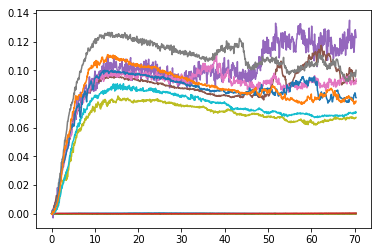

In [8]:
species = []
time = np.arange(0,5*p1_normalized.shape[0],5)/60.0
p1_normalized.index = time
p2_normalized.index = time
p3_normalized.index = time
p4_normalized.index = time

# Calculate average and std dev at all time points across all plates
fig,axes = plt.subplots(1,1,sharey=True)
#axes = np.ravel((axes))
species = ['356','360','361','492','500','502','519']
print(list(set(species) - set('361')))
for name1,group1 in plate_layout.groupby(['361']):
    for name3,group3 in group1.groupby(list(set(species) - set('361'))):
        
        if sum(name3) < 1: # if doesn't contain any species other than 361
            print(name3,group3)
            axes.plot(time,p1_normalized[list(group3['well'])])
    if name1:
        for name2,group2 in group1.groupby(['519']):
            if name2:
                print(list(group2['well']))
                all_time_courses = p1_normalized[list(group2['well'])]
                
                axes.plot(time,p1_normalized[list(group2['well'])])
                axes.plot(time,p2_normalized[list(group2['well'])])
                axes.plot(time,p3_normalized[list(group2['well'])])

                axes.plot(time,p4_normalized[list(group2['well'])])

['519']
['492']
['492', '519']
['361']
['361', '519']
['361', '492']
['360']
['360', '519']
['360', '492']
['360', '361']
['356']
['356', '519']
['356', '492']
['356', '361']
['356', '360']


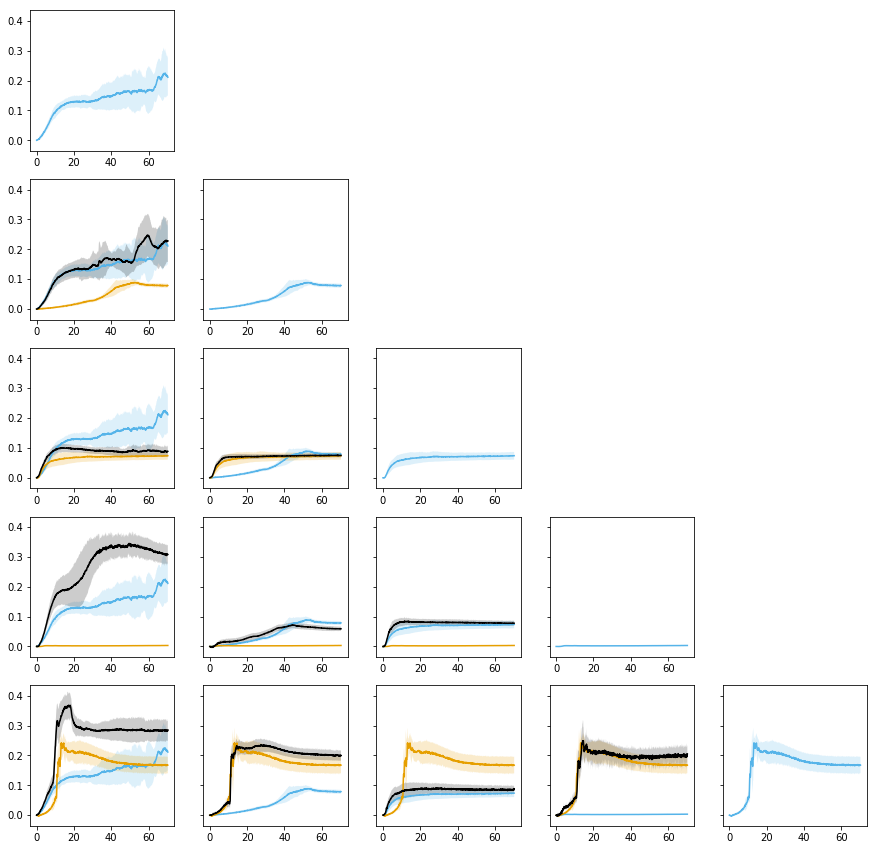

In [9]:
fig,axes = plt.subplots(5,5,sharey=True)
axes = np.ravel((axes))

position_dict = {str(['519']):[0,5,10,15,20],
str(['492', '519']):[5],
str(['492']):[5,6,11,16,21],
str(['361', '519']):[10],
str(['361', '492']):[11],
str(['361']):[10,11,12,17,22],
str(['360', '519']):[15],
str(['360', '492']):[16],
str(['360', '361']):[17],
str(['360']):[15,16,17,18,23],
str(['356', '519']):[20],
str(['356', '492']):[21],
str(['356', '361']):[22],
str(['356', '360']):[23],
                str(['356']):[20,21,22,23,24]}

# Determine the unoccupied positions in the subplots so we can skip over them in the grid
all_pos = []
list_o_lists = list(position_dict.values())
for listy in list_o_lists:
    for entry in listy:
        all_pos.append(entry)
all_pos = list(set(all_pos))
possible = [1+i for i in range(-1,24)]
unnocupied = list(set(possible) - set(all_pos))

# position dictionary if you'd like to look at all conditions
# Disclaimer: 500/502 did not grow in this experiment.
# position_dict = {str(['519']):[0,7,14,21,28,35,42],
# str(['502']):[7,8,15,22,29,36,43],
# str(['502', '519']):[7],
# str(['500']):[14,15,16,23,30,37,44],
# str(['500', '519']):[14],
# str(['500', '502']):[15],
# str(['492']):[21,22,23,24,31,38,45],
# str(['492', '519']):[21],
# str(['492', '502']):[22],
# str(['492', '500']):[23],
# str(['361']):[28,29,30,31,32,39,46],
# str(['361', '519']):[28],
# str(['361', '502']):[29],
# str(['361', '500']):[30],
# str(['361', '492']):[31],
# str(['360']):[35,36,37,38,39,40,47],
# str(['360', '519']):[35],
# str(['360', '502']):[36],
# str(['360', '500']):[37],
# str(['360', '492']):[38],
# str(['360', '361']):[39],
# str(['356']):[42,43,44,45,46,47,48],
# str(['356', '519']):[42],
# str(['356', '502']):[43],
# str(['356', '500']):[44],
# str(['356', '492']):[45],
# str(['356', '361']):[46],
# str(['356', '360']):[47]}
colors = {'black':(0,0,0),
          'orange':(230.0/255.0,159.0/255.0,0.0),
          'sky_blue':(86.0/255.0,180.0/255.0,233.0/255.0),
          'bluish_green':(0.0,158.0/255.0,115.0/255.0),
          'yellow':(240.0/255.0,228.0/255.0,66.0/255.0),
          'blue':(0.0,114.0/255.0,178.0/255.0),
          'vermillion':(213.0/255.0,94.0/255.0,0.0),
          'reddish_purple':(204.0/255.0,121.0/255.0,167.0/255.0)}
#trueplots.reverse()
#i=0
for ax in axes:
    ax.set_prop_cycle(cycler('color',[colors['sky_blue'],colors['orange'],colors['black']]))

for name,group in plate_layout.groupby(species):
    if any(name) and sum(group['species'].str.contains('500')) == 0 and sum(group['species'].str.contains('502')) == 0:# if there was at least True (should exclude blanks, since they contain no species)
        sample_group = (list(compress(species,name)))
        print(sample_group)
        
        p1_values = p1_normalized[list(group['well'])]
        p2_values = p2_normalized[list(group['well'])]
        p3_values = p3_normalized[list(group['well'])]
        p4_values = p4_normalized[list(group['well'])]
        joined = pd.concat([p1_values,p2_values,p3_values,p4_values], axis=1)
        mean = joined.mean(axis=1)
        std = joined.std(axis=1)
        for ax_index in position_dict[str(sample_group)]:
            #if ax_index%6 == 0:
            #    axes[ax_index].set_prop_cycle(cycler('color',[colors['black']]))
            #else:
            #axes[ax_index].set_prop_cycle(cycler('color',[colors['sky_blue'],colors['orange'],colors['bluish_green']]))
            
            axes[ax_index].plot(time,mean)
            axes[ax_index].fill_between(time, mean - std, mean + std, alpha = 0.2, interpolate=True)

# delete the unused axes
for ax_index in unnocupied:
    fig.delaxes(axes[ax_index])
            
fig.set_size_inches(15,15)
plt.savefig('../results/growth_curve_grid_20170206.svg',format='svg')

In [10]:
# The cells below plot all wells for every mono- and co-culture sample
# group. ASF360 had borderline growth, but was consistent enough across
# all 4 platereaders and all 8 replicates, with shape similar to Biggs
# et al. ISME J 2017, that we consider it real growth. ASF500/ASF502 did
# not appear to grow in monoculture in these experiments; interestingly,
# they did substantially modify growth curves in co-cultures, suggesting
# they were metabolizing SOMETHING/growing in co-culture.

356


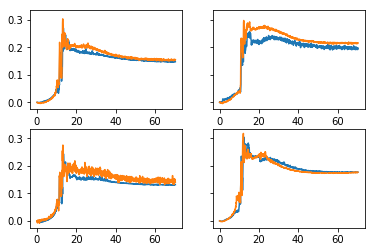

In [11]:
fig,axes = plt.subplots(2,2,sharey=True)
axes = np.ravel((axes))
for i,plate in enumerate([p1_normalized,p2_normalized,p3_normalized,p4_normalized]):
    axes[i].plot(time,plate[['B2','C2']])
print('356')
plt.show()

360


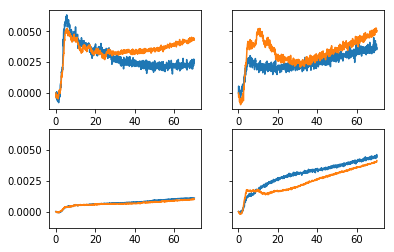

In [12]:
fig,axes = plt.subplots(2,2,sharey=True)
axes = np.ravel((axes))
for i,plate in enumerate([p1_normalized,p2_normalized,p3_normalized,p4_normalized]):
    axes[i].plot(time,plate[['D2','E2']])
print('360')
plt.show()

361


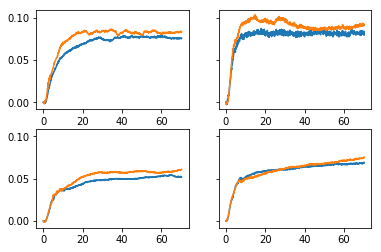

In [13]:
fig,axes = plt.subplots(2,2,sharey=True)
axes = np.ravel((axes))
for i,plate in enumerate([p1_normalized,p2_normalized,p3_normalized,p4_normalized]):
    axes[i].plot(time,plate[['F2','G2']])
print('361')
plt.show()

492


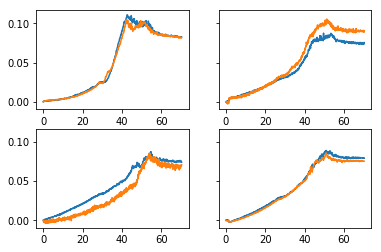

In [14]:
fig,axes = plt.subplots(2,2,sharey=True)
axes = np.ravel((axes))
for i,plate in enumerate([p1_normalized,p2_normalized,p3_normalized,p4_normalized]):
    axes[i].plot(time,plate[['B3','C3']])
print('492')
plt.show()

500


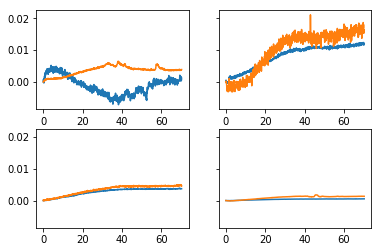

In [15]:
fig,axes = plt.subplots(2,2,sharey=True)
axes = np.ravel((axes))
for i,plate in enumerate([p1_normalized,p2_normalized,p3_normalized,p4_normalized]):
#for i,plate in enumerate([plate1,plate2,plate3,plate4]):
    axes[i].plot(time,plate[['D3','E3']])
print('500')
plt.show()

502


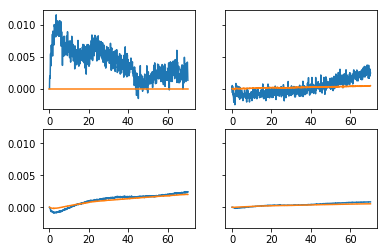

In [16]:
fig,axes = plt.subplots(2,2,sharey=True)
axes = np.ravel((axes))
for i,plate in enumerate([p1_normalized,p2_normalized,p3_normalized,p4_normalized]):
#for i,plate in enumerate([plate1,plate2,plate3,plate4]):
    axes[i].plot(time,plate[['F3','G3']])
print('502')
plt.show()

519


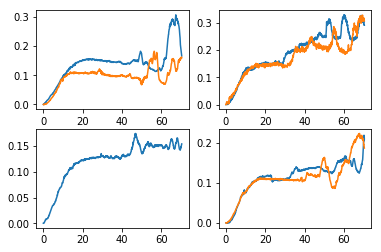

In [17]:
fig,axes = plt.subplots(2,2,sharey=False)
axes = np.ravel((axes))
for i,plate in enumerate([p1_normalized,p2_normalized,p3_normalized,p4_normalized]):
#for i,plate in enumerate([plate1,plate2,plate3,plate4]):
    axes[i].plot(time,plate[['B4','C4']])
print('519')
plt.show()

356;360


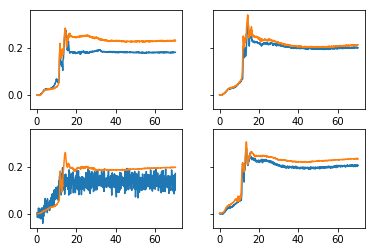

In [18]:
fig,axes = plt.subplots(2,2,sharey=True)
axes = np.ravel((axes))
for i,plate in enumerate([p1_normalized,p2_normalized,p3_normalized,p4_normalized]):
#for i,plate in enumerate([plate1,plate2,plate3,plate4]):
    axes[i].plot(time,plate[['D4','E4']])
print('356;360')
plt.show()

356;361


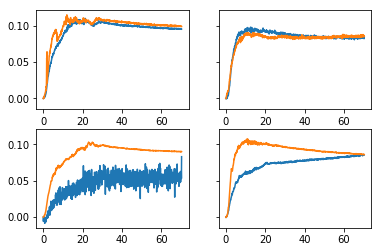

In [19]:
fig,axes = plt.subplots(2,2,sharey=True)
axes = np.ravel((axes))
for i,plate in enumerate([p1_normalized,p2_normalized,p3_normalized,p4_normalized]):
#for i,plate in enumerate([plate1,plate2,plate3,plate4]):
    axes[i].plot(time,plate[['F4','G4']])
print('356;361')
plt.show()

356;492


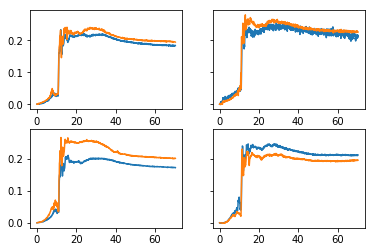

In [20]:
fig,axes = plt.subplots(2,2,sharey=True)
axes = np.ravel((axes))
for i,plate in enumerate([p1_normalized,p2_normalized,p3_normalized,p4_normalized]):
    axes[i].plot(time,plate[['B5','C5']])
print('356;492')
plt.show()

356;500


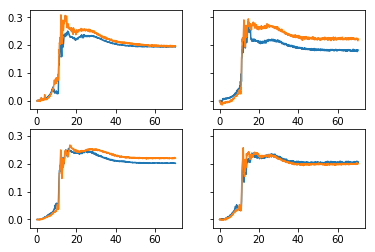

In [21]:
fig,axes = plt.subplots(2,2,sharey=True)
axes = np.ravel((axes))
for i,plate in enumerate([p1_normalized,p2_normalized,p3_normalized,p4_normalized]):
    axes[i].plot(time,plate[['D5','E5']])
print('356;500')
plt.show()

356;502


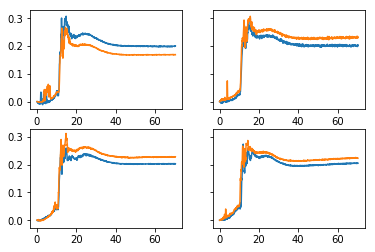

In [22]:
fig,axes = plt.subplots(2,2,sharey=True)
axes = np.ravel((axes))
for i,plate in enumerate([p1_normalized,p2_normalized,p3_normalized,p4_normalized]):
    axes[i].plot(time,plate[['F5','G5']])
print('356;502')
plt.show()

356;519


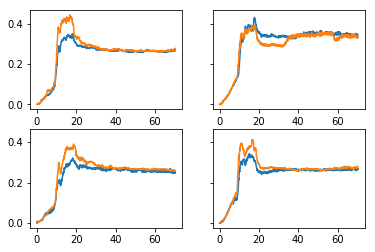

In [23]:
fig,axes = plt.subplots(2,2,sharey=True)
axes = np.ravel((axes))
for i,plate in enumerate([p1_normalized,p2_normalized,p3_normalized,p4_normalized]):
    axes[i].plot(time,plate[['B6','C6']])
print('356;519')
plt.show()

360;361


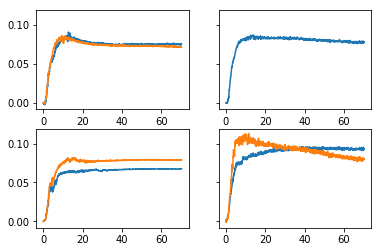

In [24]:
fig,axes = plt.subplots(2,2,sharey=True)
axes = np.ravel((axes))
for i,plate in enumerate([p1_normalized,p2_normalized,p3_normalized,p4_normalized]):
#for i,plate in enumerate([plate1,plate2,plate3,plate4]):
    axes[i].plot(time,plate[['D6','E6']])
print('360;361')
plt.show()

360;492


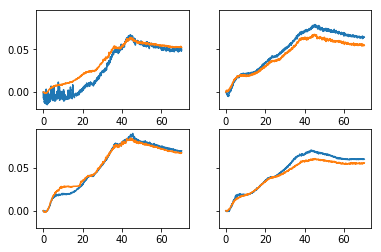

In [25]:
fig,axes = plt.subplots(2,2,sharey=True)
axes = np.ravel((axes))
for i,plate in enumerate([p1_normalized,p2_normalized,p3_normalized,p4_normalized]):
    axes[i].plot(time,plate[['F6','G6']])
print('360;492')
plt.show()

360;500


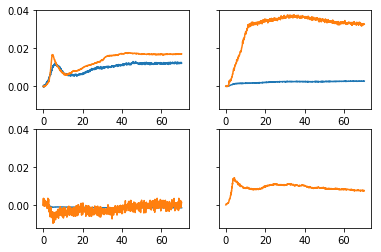

In [26]:
fig,axes = plt.subplots(2,2,sharey=True)
axes = np.ravel((axes))
for i,plate in enumerate([p1_normalized,p2_normalized,p3_normalized,p4_normalized]):
#for i,plate in enumerate([plate1,plate2,plate3,plate4]):
    axes[i].plot(time,plate[['B7','C7']])
print('360;500')
plt.show()

360;502


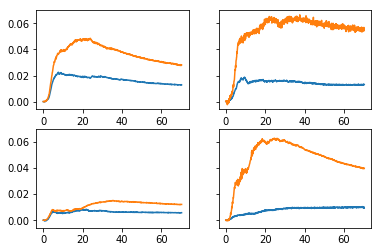

In [27]:
fig,axes = plt.subplots(2,2,sharey=True)
axes = np.ravel((axes))
for i,plate in enumerate([p1_normalized,p2_normalized,p3_normalized,p4_normalized]):
    axes[i].plot(time,plate[['D7','E7']])
print('360;502')
plt.show()

360;519


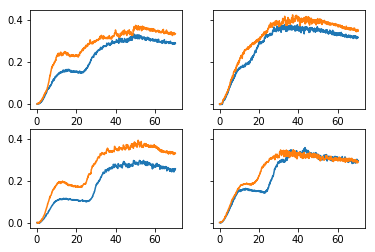

In [28]:
fig,axes = plt.subplots(2,2,sharey=True)
axes = np.ravel((axes))
for i,plate in enumerate([p1_normalized,p2_normalized,p3_normalized,p4_normalized]):
#for i,plate in enumerate([plate1,plate2,plate3,plate4]):
    axes[i].plot(time,plate[['F7','G7']])
print('360;519')
plt.show()

361;492


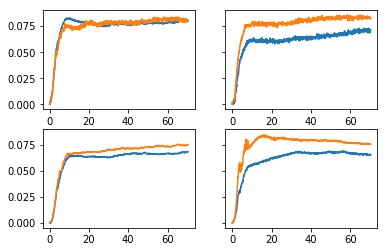

In [29]:
fig,axes = plt.subplots(2,2,sharey=True)
axes = np.ravel((axes))
for i,plate in enumerate([p1_normalized,p2_normalized,p3_normalized,p4_normalized]):
    axes[i].plot(time,plate[['B8','C8']])
print('361;492')
plt.show()

361;500


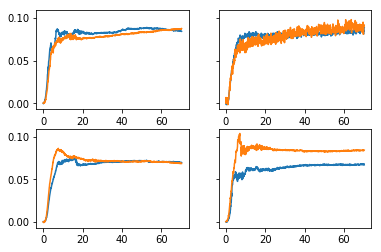

In [30]:
fig,axes = plt.subplots(2,2,sharey=True)
axes = np.ravel((axes))
for i,plate in enumerate([p1_normalized,p2_normalized,p3_normalized,p4_normalized]):
#for i,plate in enumerate([plate1,plate2,plate3,plate4]):
    axes[i].plot(time,plate[['D8','E8']])
print('361;500')
plt.show()

361;502


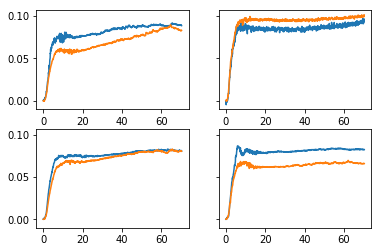

In [31]:
fig,axes = plt.subplots(2,2,sharey=True)
axes = np.ravel((axes))
for i,plate in enumerate([p1_normalized,p2_normalized,p3_normalized,p4_normalized]):
    axes[i].plot(time,plate[['F8','G8']])
print('361;502')
plt.show()

361;519


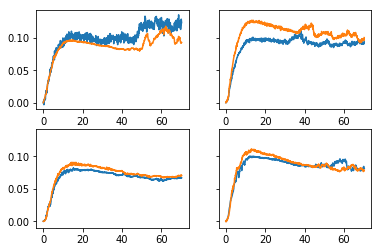

In [32]:
fig,axes = plt.subplots(2,2,sharey=True)
axes = np.ravel((axes))
for i,plate in enumerate([p1_normalized,p2_normalized,p3_normalized,p4_normalized]):
#for i,plate in enumerate([plate1,plate2,plate3,plate4]):
    axes[i].plot(time,plate[['B9','C9']])
print('361;519')
plt.show()

492;500


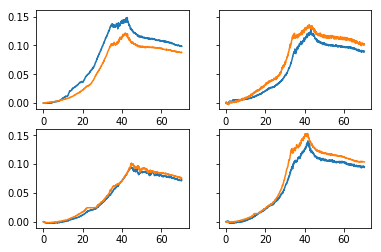

In [33]:
fig,axes = plt.subplots(2,2,sharey=True)
axes = np.ravel((axes))
for i,plate in enumerate([p1_normalized,p2_normalized,p3_normalized,p4_normalized]):
    axes[i].plot(time,plate[['D9','E9']])
print('492;500')
plt.show()

492;502


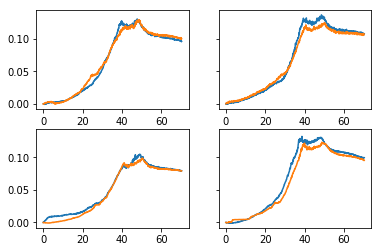

In [34]:
fig,axes = plt.subplots(2,2,sharey=True)
axes = np.ravel((axes))
for i,plate in enumerate([p1_normalized,p2_normalized,p3_normalized,p4_normalized]):
    axes[i].plot(time,plate[['F9','G9']])
print('492;502')
plt.show()

492;519


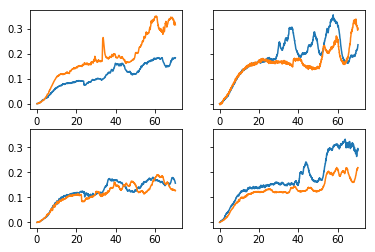

In [35]:
fig,axes = plt.subplots(2,2,sharey=True)
axes = np.ravel((axes))
for i,plate in enumerate([p1_normalized,p2_normalized,p3_normalized,p4_normalized]):
    axes[i].plot(time,plate[['B10','C10']])
print('492;519')
plt.show()

500;502


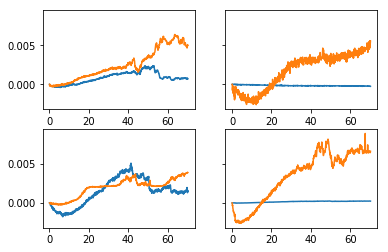

In [36]:
fig,axes = plt.subplots(2,2,sharey=True)
axes = np.ravel((axes))
for i,plate in enumerate([p1_normalized,p2_normalized,p3_normalized,p4_normalized]):
#for i,plate in enumerate([plate1,plate2,plate3,plate4]):
    axes[i].plot(time,plate[['D10','E10']])
print('500;502')
plt.show()

500;519


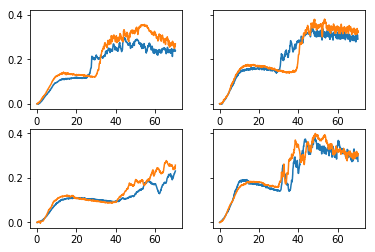

In [37]:
fig,axes = plt.subplots(2,2,sharey=True)
axes = np.ravel((axes))
for i,plate in enumerate([p1_normalized,p2_normalized,p3_normalized,p4_normalized]):
    axes[i].plot(time,plate[['F10','G10']])
print('500;519')
plt.show()

502;519


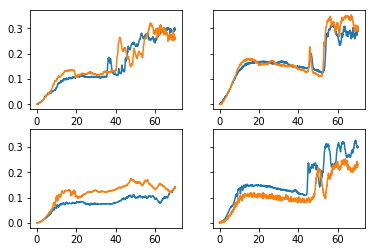

In [38]:
fig,axes = plt.subplots(2,2,sharey=True)
axes = np.ravel((axes))
for i,plate in enumerate([p1_normalized,p2_normalized,p3_normalized,p4_normalized]):
    axes[i].plot(time,plate[['B11','C11']])
print('502;519')

plt.show()

BLANK


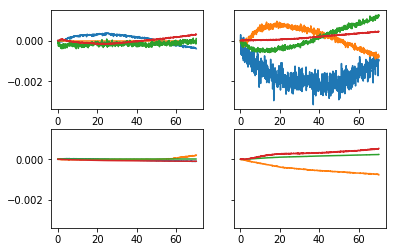

In [39]:
fig,axes = plt.subplots(2,2,sharey=True)
axes = np.ravel((axes))
for i,plate in enumerate([p1_normalized,p2_normalized,p3_normalized,p4_normalized]):
    axes[i].plot(time,plate[['D11','E11','F11','G11']])
print('BLANK')
plt.show()

BLANK


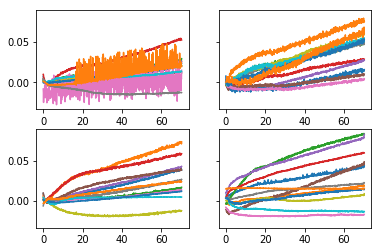

In [40]:
fig,axes = plt.subplots(2,2,sharey=True)
axes = np.ravel((axes))
for i,plate in enumerate([plate1,plate2,plate3,plate4]):
    #axes[i].plot(time,plate[['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12']])
    axes[i].plot(time,plate[['H1','H2','H3','H4','H5','H6','H7','H8','H9','H10','H11','H12']])
    #axes[i].plot(time,plate[['A1','B1','C1','D1','E1','F1','G1','H1']])
    #axes[i].plot(time,plate[['A12','B12','C12','D12','E12','F12','G12','H12']])
print('BLANK')
plt.show()